In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_classification

In [15]:
x,Y = make_classification(n_classes = 2 ,n_clusters_per_class = 1,random_state=3, n_samples=400,n_features=2 , n_informative=2,n_redundant=0)

In [28]:
Y[Y==0] = -1
print(Y)

[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1
  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1
 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1
  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1
  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1
 -1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1
  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1
 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1

In [16]:
import matplotlib.pyplot as plt

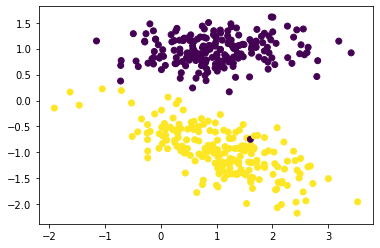

In [29]:
plt.scatter(x[:,0],x[:,1] , c = Y)

In [67]:
class svm:
    def __init__(self,c=1.0):
        self.c = c
        self.w = 0
        self.b = 0
    def hingeLoss(self,w,b,x,y):
        loss = 0.0
        loss+=0.5*np.dot(w,w.T)
        m = x.shape[0]
        for i in range(m):
            ti = y[i]*(np.dot(w,x[i].T)+b)
            loss+=self.c*max(0,(1-ti))
        return loss[0][0]
    
    def fit(self , x, y ,batch_sie = 100 , lear = 0.001,maxitr=300):
        no_of_feature = x.shape[1]
        no_of_samples = y.shape[0]
        n = lear
        c= self.c
        w = np.zeros((1,no_of_feature))
        bias = 0
        
        print(self.hingeLoss(w,bias,x,y))
        
        losses = []
        for i in range(maxitr):
            l = self.hingeLoss(w,bias,x,y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            
            #batch gradient descent with random shuffle
            for batch_start in range(0,no_of_samples,batch_sie):
                gradw = 0
                gradb = 0
                
                #iterate over all examples in minit batch
                for j in range(batch_start , batch_start+batch_sie):
                    if j < no_of_samples:
                        i = ids[j]
                        ti =y[i]*(np.dot(w,x[i].T)+bias)
                        if ti>1:
                            gradw+=0
                            gradb+=0
                        else:
                            gradw+=c* y[i]*x[i]
                            gradb+=c*y[i]
                w = w-n*w  + n*gradw
                bias = bias +n*gradb
        self.w = w
        self.b = bias
        return w,bias,losses

In [68]:
mySVM = svm()


In [69]:
w,b,losses = mySVM.fit(x,Y)

400.0


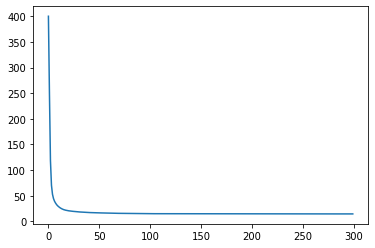

In [72]:
plt.plot(losses)

In [90]:
def pltDescionBoundary(w1,w2,bias):
    x1 = np.linspace(-2,4,10)
    x2 = -(w1*x1+b)/w2
    xp = -(w1*x1+b+1)/w2
    xn = -(w1*x1+b-1)/w2
    plt.plot(x1,xp)
    plt.plot(x1,xn)
    plt.plot(x1,x2)
    plt.scatter(x[:,0],x[:,1] , c = Y)
    

In [91]:
w,b = mySVM.w , mySVM.b

In [92]:
w

array([[-0.34689699, -2.0931329 ]])

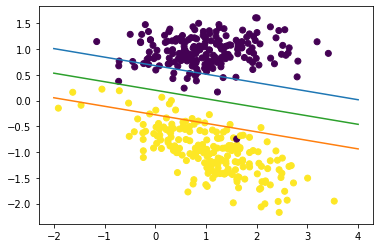

In [93]:
pltDescionBoundary(w[0,0],w[0,1] , b)